In [1]:
acc = []
pre = []
rec = []
f1 = []
roc = []
spe = []

In [2]:
def append_metric(path):
    with open(path, 'r') as file:
        righe = file.readlines()

    riga = righe[1].strip()
    metrics = riga.split(':')
    acc.append(metrics[1])
    pre.append(metrics[3])
    rec.append(metrics[5])
    f1.append(metrics[7])
    roc.append(metrics[9])
    spe.append(metrics[11])

def convert(lista):
    lista_interi = [float(valore) for valore in lista]
    return lista_interi


path = '../logs/dt_original_data_smotenc.log'
append_metric(path)

path = '../logs/dt_original_data_autoencoder.log'
append_metric(path)

path = '../logs/dt_dummy_data_smotenc.log'
append_metric(path)

path = '../logs/dt_dummy_data_autoencoder.log'
append_metric(path)

path = '../logs/dt_pca_data_smotenc.log'
append_metric(path)

path = '../logs/dt_pca_data_autoencoder.log'
append_metric(path)

acc = convert(acc)
pre = convert(pre)
rec = convert(rec)
f1 = convert(f1)
roc = convert(roc)
spe = convert(spe)

In [3]:
modelli = ['original\nwith smotenc', 'original\nwith autoencoder', 
           'dummy\nwith smotenc', 'dummy\nwith autoencoder',
           'pca\nwith smotenc', 'pca\nwith autoencoder']

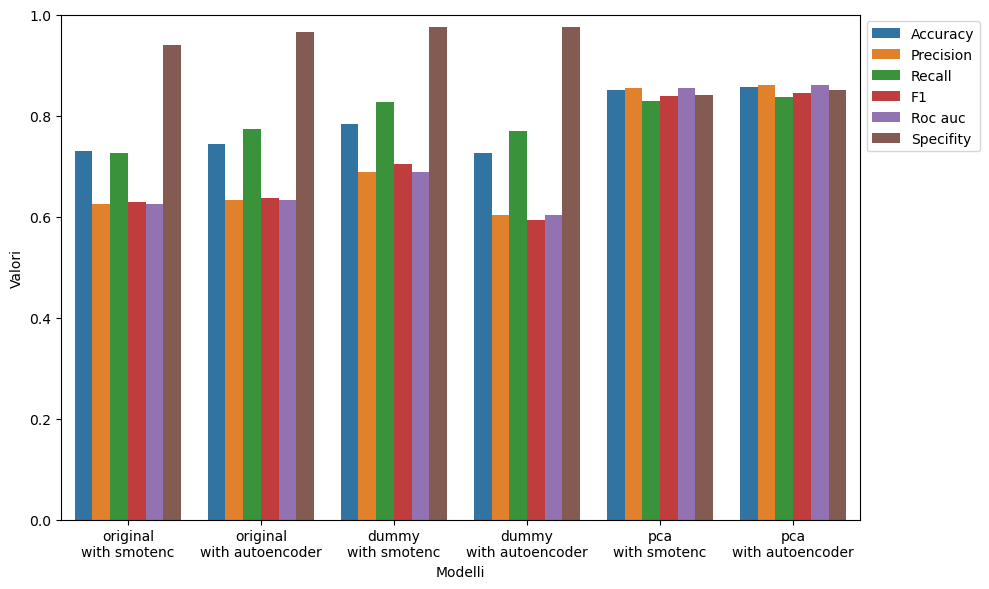

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creazione di un DataFrame per Seaborn
df = pd.DataFrame({
    'Modelli': modelli * 6,
    'Metriche': ['Accuracy'] * len(modelli) + ['Precision'] * len(modelli) + 
                ['Recall'] * len(modelli) + ['F1'] * len(modelli) + 
                ['Roc auc'] * len(modelli) + ['Specifity'] * len(modelli),
    'Valori': acc + pre + rec + f1 + roc + spe
})

# Creazione del grafico a barre raggruppato con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelli', y='Valori', hue='Metriche', data=df)
plt.ylim(0, 1)

# Impostare la legenda al centro
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()